In [1]:
## Assignment 2: Movie Ratings & Revenue Analysis
## Creating movies.csv
csv_data = """
 MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
1,Inception,Sci-Fi,2010-07-16,8.8,825532764,160000000
2,The Dark Knight,Action,2008-07-18,9.0,1004558444,185000000
3,Titanic,Romance,1997-12-19,7.8,2187463944,200000000
4,Interstellar,Sci-Fi,2014-11-07,8.6,677471339,165000000
5,Joker,Drama,2019-10-04,8.4,1074251311,55000000
6,The Notebook,Romance,2004-06-25,7.9,,29000000
7,Avengers: Endgame,Action,2019-04-26,8.4,2797800564,356000000
"""

with open('movies.csv','w') as file:
  file.write(csv_data)

### Part 1: Pandas Operations


In [2]:
# Loading movies.csv into Pandas DataFrame
import pandas as pd

df = pd.read_csv('movies.csv')
print(df)

    MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0         1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1         2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2         3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3         4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4         5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5         6       The Notebook  Romance  2004-06-25     7.9           NaN   
6         7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget  
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  


In [3]:
#  Convert ReleaseDate to datetime
print(df.info()) # Checking datatypes
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
print(df["ReleaseDate"].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0    MovieID     7 non-null      int64  
 1   Title        7 non-null      object 
 2   Genre        7 non-null      object 
 3   ReleaseDate  7 non-null      object 
 4   Rating       7 non-null      float64
 5   Revenue      6 non-null      float64
 6   Budget       7 non-null      int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 524.0+ bytes
None
<class 'pandas.core.series.Series'>
RangeIndex: 7 entries, 0 to 6
Series name: ReleaseDate
Non-Null Count  Dtype         
--------------  -----         
7 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 188.0 bytes
None


In [4]:
# Calculate Profit = Revenue - Budget
df.columns = df.columns.str.strip()
df['Profit'] = df['Revenue']-df['Budget']
print(df[['Revenue','Budget','Profit']])

        Revenue     Budget        Profit
0  8.255328e+08  160000000  6.655328e+08
1  1.004558e+09  185000000  8.195584e+08
2  2.187464e+09  200000000  1.987464e+09
3  6.774713e+08  165000000  5.124713e+08
4  1.074251e+09   55000000  1.019251e+09
5           NaN   29000000           NaN
6  2.797801e+09  356000000  2.441801e+09


In [5]:
# Add categorical column Era
def classify_era(date):
  year = date.year
  if year < 2000:
    return 'Classic'
  elif 2000 <= year <= 2010:
    return 'Mid'
  else:
    return 'Modern'

df['Era'] = df['ReleaseDate'].apply(classify_era)
print(df[['ReleaseDate','Era']])

  ReleaseDate      Era
0  2010-07-16      Mid
1  2008-07-18      Mid
2  1997-12-19  Classic
3  2014-11-07   Modern
4  2019-10-04   Modern
5  2004-06-25      Mid
6  2019-04-26   Modern


In [6]:
#  Handle nulls in Revenue by filling with average revenue
# df.isnull().sum()
# Check null values
#df['Revenue'].isnull()
# Filling null values
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean())
print(df[['Revenue','Budget','Profit']])


        Revenue     Budget        Profit
0  8.255328e+08  160000000  6.655328e+08
1  1.004558e+09  185000000  8.195584e+08
2  2.187464e+09  200000000  1.987464e+09
3  6.774713e+08  165000000  5.124713e+08
4  1.074251e+09   55000000  1.019251e+09
5  1.427846e+09   29000000           NaN
6  2.797801e+09  356000000  2.441801e+09


In [7]:
#  6. Sort by Rating descending.
Rating_Sorted = df.sort_values(by='Rating', ascending=False)
print(Rating_Sorted)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9  1.427846e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   

      Budget        Profit      Era  
1  185000000  8.195584e+08      Mid  
0  160000000  6.655328e+08      Mid  
3  165000000  5.124713e+08   Modern  
6  356000000  2.441801e+09   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
2  200000000  1.987464e+09  Classic  


In [8]:
# Group by Genre → average Rating & total Revenue
genre_stats = df.groupby('Genre').agg({'Rating':'mean', 'Revenue':'sum'})
genre_stats.column = ['Genre','AverageRating','TotalRevenue']
print(genre_stats)

         Rating       Revenue
Genre                        
Action     8.70  3.802359e+09
Drama      8.40  1.074251e+09
Romance    7.85  3.615310e+09
Sci-Fi     8.70  1.503004e+09


/tmp/ipython-input-3004237454.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  genre_stats.column = ['Genre','AverageRating','TotalRevenue']


In [9]:
# Filter movies with Rating ≥ 8.5 and Profit > 500M.
filtered_movies = df[(df['Rating'] >= 8.5) & (df['Profit'] > 500000000)]
print(filtered_movies[['Title', 'Rating', 'Profit']])

             Title  Rating       Profit
0        Inception     8.8  665532764.0
1  The Dark Knight     9.0  819558444.0
3     Interstellar     8.6  512471339.0


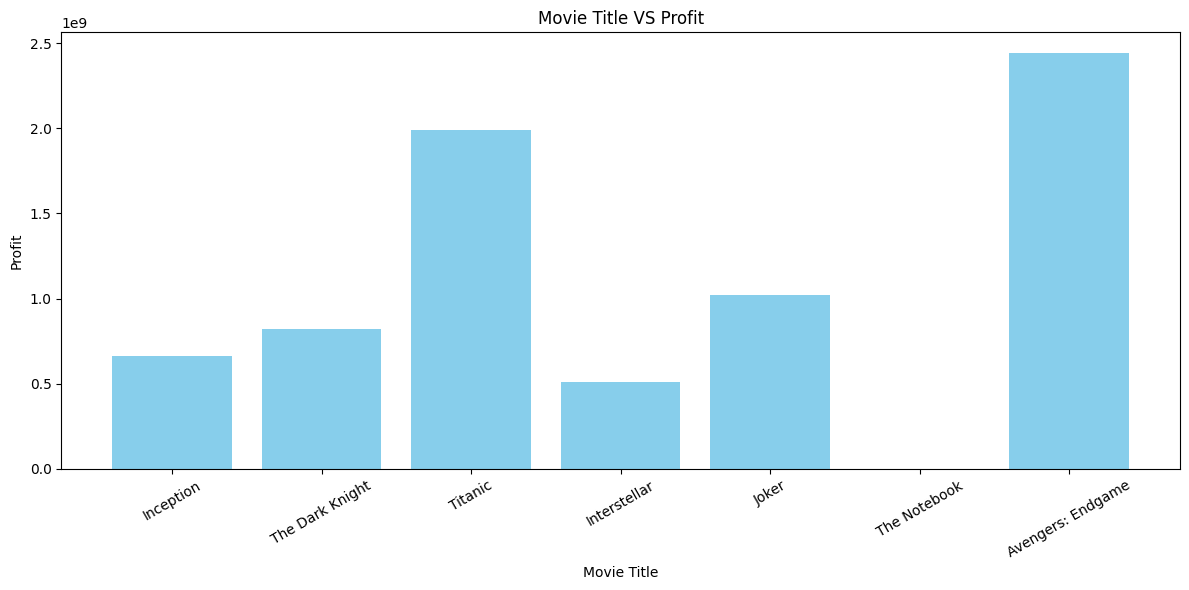

In [10]:
# Plot bar chart of Movie Title vs Profit.
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(df['Title'], df['Profit'], color = 'skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Profit')
plt.title('Movie Title VS Profit')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Part 2: PySpark Operations


In [11]:
# Creating a spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PySparks").getOrCreate()
spark

In [12]:
# Read the same CSV using PySpark.
df = spark.read.csv('movies.csv', header=True, inferSchema=True)
df.show()

+--------+-----------------+-------+-----------+------+----------+---------+
| MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|
+--------+-----------------+-------+-----------+------+----------+---------+
|       1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000|
|       2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000|
|       3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|
|       4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000|
|       5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|
|       6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|
|       7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|
+--------+-----------------+-------+-----------+------+----------+---------+



In [13]:
#  Create Profit column (Revenue - Budget )
from pyspark.sql.functions import col

df = df.withColumn("Profit", col("Revenue")-col("Budget"))
df.select("Title", "Revenue", "Budget", "Profit").show()

+-----------------+----------+---------+----------+
|            Title|   Revenue|   Budget|    Profit|
+-----------------+----------+---------+----------+
|        Inception| 825532764|160000000| 665532764|
|  The Dark Knight|1004558444|185000000| 819558444|
|          Titanic|2187463944|200000000|1987463944|
|     Interstellar| 677471339|165000000| 512471339|
|            Joker|1074251311| 55000000|1019251311|
|     The Notebook|      NULL| 29000000|      NULL|
|Avengers: Endgame|2797800564|356000000|2441800564|
+-----------------+----------+---------+----------+



In [14]:
#  Filter where Genre == 'Sci-Fi' and Profit > 500000000
sci_fi = df.filter((col("Genre") == "Sci-Fi") & (col("Profit") > 500000000))
sci_fi.select("Title", "Genre", "Profit").show()

+------------+------+---------+
|       Title| Genre|   Profit|
+------------+------+---------+
|   Inception|Sci-Fi|665532764|
|Interstellar|Sci-Fi|512471339|
+------------+------+---------+



In [15]:
# Group by Genre → avg(Rating), sum(Profit)
from pyspark.sql.functions import avg, sum, col

genre_group = df.groupBy("Genre").agg( avg("Rating").alias("AvgRating"), sum("Profit").alias("TotalProfit"))
genre_group.show()

+-------+---------+-----------+
|  Genre|AvgRating|TotalProfit|
+-------+---------+-----------+
|Romance|     7.85| 1987463944|
|  Drama|      8.4| 1019251311|
| Action|      8.7| 3261359008|
| Sci-Fi|      8.7| 1178004103|
+-------+---------+-----------+



In [16]:
#  Use when().otherwise() to classify Rating as: =9 → Blockbuster
# 8–9 → Hit
# below 8 → Average
from pyspark.sql.functions import when
df_category = df.withColumn("Rating_Category", when(col("Rating") >=9, 'Blockbuster').when(col("Rating") > 8, 'Hit').otherwise("Average"))
df_category.show()



+--------+-----------------+-------+-----------+------+----------+---------+----------+---------------+
| MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Rating_Category|
+--------+-----------------+-------+-----------+------+----------+---------+----------+---------------+
|       1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|            Hit|
|       2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|    Blockbuster|
|       3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|        Average|
|       4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|            Hit|
|       5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|            Hit|
|       6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|        Average|
|       7|Avengers: Endgame| Action| 2019-04-26|   8.4|279780056

In [17]:
# Drop the Budget column.
df = df.drop("Budget")
df.show(3)

+--------+---------------+-------+-----------+------+----------+----------+
| MovieID|          Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|
+--------+---------------+-------+-----------+------+----------+----------+
|       1|      Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|
|       2|The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|
|       3|        Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|
+--------+---------------+-------+-----------+------+----------+----------+
only showing top 3 rows



In [18]:
#  Fill null revenue with average (use na.fill() or na.replace() )
# na.fill() is used to fill null values
# na.replace is used to replace values
df.select("Revenue").show()
avg_revenue = df.select(avg("Revenue")).first()[0]
df = df.na.fill({"Revenue": avg_revenue})
df.select("Revenue").show()

+----------+
|   Revenue|
+----------+
| 825532764|
|1004558444|
|2187463944|
| 677471339|
|1074251311|
|      NULL|
|2797800564|
+----------+

+----------+
|   Revenue|
+----------+
| 825532764|
|1004558444|
|2187463944|
| 677471339|
|1074251311|
|1427846394|
|2797800564|
+----------+



In [19]:
# Convert ReleaseDate to date type, extract year and month

from pyspark.sql.functions import to_date, year, month

df = df.withColumn("ReleaseDate", to_date("ReleaseDate", "yyyy-MM-dd"))
df = df.withColumn("Year", year("ReleaseDate"))
df = df.withColumn("Month", month("ReleaseDate"))
df.select("ReleaseDate", "Year", "Month").show()

+-----------+----+-----+
|ReleaseDate|Year|Month|
+-----------+----+-----+
| 2010-07-16|2010|    7|
| 2008-07-18|2008|    7|
| 1997-12-19|1997|   12|
| 2014-11-07|2014|   11|
| 2019-10-04|2019|   10|
| 2004-06-25|2004|    6|
| 2019-04-26|2019|    4|
+-----------+----+-----+



In [20]:
#  Use a window function to rank movies within each genre by profit.
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col

window_rn = Window.partitionBy("Genre").orderBy(col("Profit").desc())
df = df.withColumn("G_Rank", rank().over(window_rn))
df.select("Title", "Genre", "Profit", "G_Rank").show()

+-----------------+-------+----------+------+
|            Title|  Genre|    Profit|G_Rank|
+-----------------+-------+----------+------+
|Avengers: Endgame| Action|2441800564|     1|
|  The Dark Knight| Action| 819558444|     2|
|            Joker|  Drama|1019251311|     1|
|          Titanic|Romance|1987463944|     1|
|     The Notebook|Romance|      NULL|     2|
|        Inception| Sci-Fi| 665532764|     1|
|     Interstellar| Sci-Fi| 512471339|     2|
+-----------------+-------+----------+------+



### Part 3: JSON + Union Example

In [21]:
# JSON Data
import json

movies_bonus = [
    {
        "MovieID": 8,
        "Title": "Barbie",
        "Genre": "Drama",
        "Rating": 7.5,
        "Revenue": 1456000000,
        "Budget": 145000000
    },
    {
        "MovieID": 9,
        "Title": "Oppenheimer",
        "Genre": "Drama",
        "Rating": 8.6,
        "Revenue": 950000000,
        "Budget": 100000000
    }
]

with open("movies_bonus.json", "w") as f:
    json.dump(movies_bonus, f, indent=4)


In [22]:
# Read using pyspark
df_bonus = spark.read.option("multiline", "true").json("movies_bonus.json")
df_bonus.show()


+---------+-----+-------+------+----------+-----------+
|   Budget|Genre|MovieID|Rating|   Revenue|      Title|
+---------+-----+-------+------+----------+-----------+
|145000000|Drama|      8|   7.5|1456000000|     Barbie|
|100000000|Drama|      9|   8.6| 950000000|Oppenheimer|
+---------+-----+-------+------+----------+-----------+



In [28]:
# Select matching columns

df = df.toDF(*[col.strip() for col in df.columns])
df_bonus = df_bonus.toDF(*[col.strip() for col in df_bonus.columns])

common_cols = ["MovieID", "Title", "Genre", "Rating", "Revenue"]
df_main = df.select(common_cols)
df_bonus = df_bonus.select(common_cols)

# Union
df_merged = df_main.unionByName(df_bonus)
df_merged.show()

+-------+-----------------+-------+------+----------+
|MovieID|            Title|  Genre|Rating|   Revenue|
+-------+-----------------+-------+------+----------+
|      1|        Inception| Sci-Fi|   8.8| 825532764|
|      2|  The Dark Knight| Action|   9.0|1004558444|
|      3|          Titanic|Romance|   7.8|2187463944|
|      4|     Interstellar| Sci-Fi|   8.6| 677471339|
|      5|            Joker|  Drama|   8.4|1074251311|
|      6|     The Notebook|Romance|   7.9|1427846394|
|      7|Avengers: Endgame| Action|   8.4|2797800564|
|      8|           Barbie|  Drama|   7.5|1456000000|
|      9|      Oppenheimer|  Drama|   8.6| 950000000|
+-------+-----------------+-------+------+----------+



In [30]:
# Show top 5 highest grossing movies.
df_merged.orderBy("Revenue", ascending = False).show()

+-------+-----------------+-------+------+----------+
|MovieID|            Title|  Genre|Rating|   Revenue|
+-------+-----------------+-------+------+----------+
|      7|Avengers: Endgame| Action|   8.4|2797800564|
|      3|          Titanic|Romance|   7.8|2187463944|
|      8|           Barbie|  Drama|   7.5|1456000000|
|      6|     The Notebook|Romance|   7.9|1427846394|
|      5|            Joker|  Drama|   8.4|1074251311|
|      2|  The Dark Knight| Action|   9.0|1004558444|
|      9|      Oppenheimer|  Drama|   8.6| 950000000|
|      1|        Inception| Sci-Fi|   8.8| 825532764|
|      4|     Interstellar| Sci-Fi|   8.6| 677471339|
+-------+-----------------+-------+------+----------+



In [32]:
# Save final merged DataFrame as CSV.
df_merged.write.mode("overwrite").option("header", True).csv("merged_output")